#### Attention the runs werent run with bed def 2.4e20 but with the 1e21

In [1]:
import numpy as np
import pandas as pd
import dimarray as da
import shutil
from matplotlib import pylab as plt
from matplotlib import ticker, cm, colors
import cmocean
import glob
import os
import seaborn as sns
import os.path
from scipy  import stats as st
projection_folder ='18000m_bed_def_mantle_viscosity_2.4e20/'

ptt = '/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/' +projection_folder
ts = 'ts_gris_18000m.nc'
sec_to_year = 1/(3600*24*365)/1000 # into ka
gris = 'gris_18000m.nc'

In [2]:
import seaborn as sns

sns.set_context('paper')

# sns.set(font_scale=1.3)


sns.set_style("whitegrid", {'axes.grid' : False,'font.family':'serif', 'font.serif':'Times New Roman'})

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
#     "font.family": "Times New Roman",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    'legend.handlelength': 1
}

plt.rcParams.update(tex_fonts)

In [3]:
sia_e = 3
q =0.1
ssa_n = 3

In [4]:

dT_file = 'dT_1degCp10000a.nc'


In [9]:
ptt_input =ptt.split('projection_runs')[0]+'input_data/'+dT_file
ds = da.read_nc(ptt_input)
dT_year = ds['delta_T'].values
dts=[
    'AA_robinson_from_2rd_pa_t0_'+str(int(ds.time[-1]/1000))+'k_',
    'AAyearly_robinson_from_2rd_pa_t0_'+str(int(ds.time[-1]/1000))+'k_',
    

    
]
# dt='from3rd_pa_t0_150k_'

dirs = []
# qs = [0.2,0.4]
q = 0.1
for dt in dts:
    dirs.append(dt+dT_file.split('.nc')[0]+'_AA_ssa_n_'+str(ssa_n)+'_q_'+str(q)+'_sia_e_'+str(sia_e))


In [10]:
dirs.append('from_1st_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3')
dirs.append('from_2nd_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3')

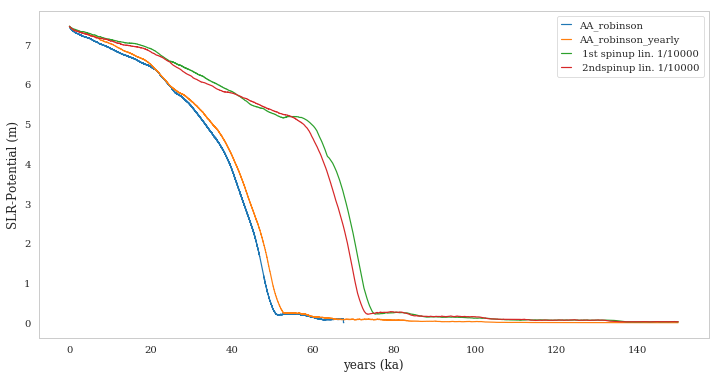

In [11]:
lb =['AA_robinson','AA_robinson_yearly', ' 1st spinup lin. 1/10000',' 2ndspinup lin. 1/10000']

f,ax = plt.subplots(1,1, figsize = (12,6))
for i,folder in enumerate(dirs):
    path = ptt + folder +'/'+ts
    d = da.read_nc(path, 'sea_level_rise_potential')
#     lb = folder.split('_')[1]
    l1 =ax.plot(d.time*sec_to_year,d.values ,label = lb[i])
ax.set_xlabel('years (ka)')
ax.set_ylabel('SLR-Potential (m)')
ax.legend()
    

I guess that means I can take a yearly time step ...



### checking other precipitation scaling/ input temp

In [12]:
dirs.append('AA_robinson_from_2rd_pa_t0_150k_precip_annual_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3')
dirs.append('AAyearly_robinson_from_2rd_pa_t0_150k_precip_annual_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3')
dirs.append('from_2nd_pa_t0_150k_precip_adjdT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3')

In [13]:
lb.append('AA_robinson precip input yearly')
lb.append('AA_robinson yearly step precip input yearly')
lb.append('2ndspinup lin. 1/10000 precip T lapserate')

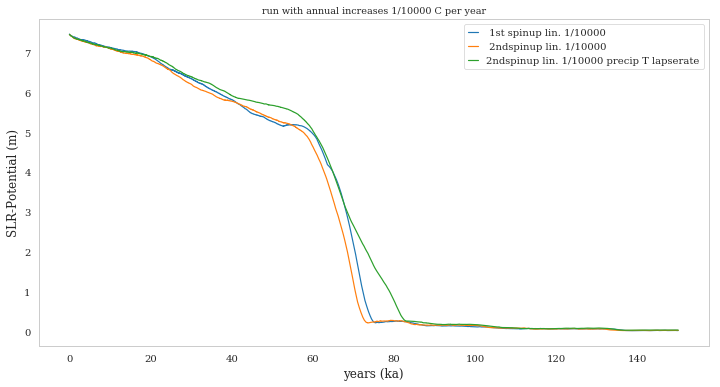

In [18]:
dirs_loc = dirs[2:4]
lb_loc = lb[2:4]
dirs_loc.append(dirs[-1])
lb_loc.append(lb[-1])
f,ax = plt.subplots(1,1, figsize = (12,6))
for i,folder in enumerate(dirs_loc):
    path = ptt + folder +'/'+ts
    d = da.read_nc(path, 'sea_level_rise_potential')
#     lb = folder.split('_')[1]
    l1 =ax.plot(d.time*sec_to_year,d.values ,label = lb_loc[i])
ax.set_xlabel('years (ka)')
ax.set_ylabel('SLR-Potential (m)')
ax.set_title('run with annual increases 1/10000 C per year')
ax.legend()

In [21]:
dirs

['AA_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'from_1st_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3',
 'from_2nd_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3',
 'AA_robinson_from_2rd_pa_t0_150k_precip_annual_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'AAyearly_robinson_from_2rd_pa_t0_150k_precip_annual_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'from_2nd_pa_t0_150k_precip_adjdT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3']

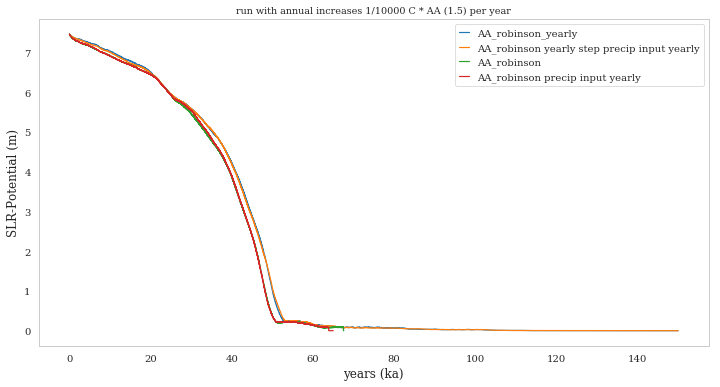

In [22]:
dirs_AA = [dirs[1]]
dirs_AA.append(dirs[-2])
dirs_AA.append(dirs[0])
dirs_AA.append(dirs[-3])

lb_AA = [lb[1]]
lb_AA.append(lb[-2])
lb_AA.append(lb[0])
lb_AA.append(lb[-3])

f,ax = plt.subplots(1,1, figsize = (12,6))
for i,folder in enumerate(dirs_AA):
    path = ptt + folder +'/'+ts
    d = da.read_nc(path, 'sea_level_rise_potential')
#     lb = folder.split('_')[1]
    l1 =ax.plot(d.time*sec_to_year,d.values ,label = lb_AA[i])
ax.set_xlabel('years (ka)')
ax.set_ylabel('SLR-Potential (m)')
ax.set_title('run with annual increases 1/10000 C * AA (1.5) per year')
ax.legend()

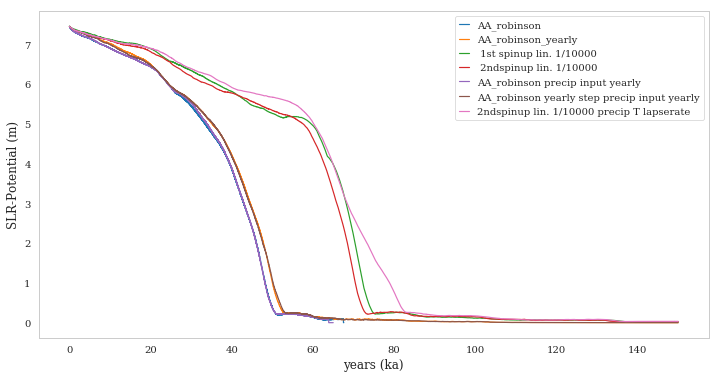

In [14]:
f,ax = plt.subplots(1,1, figsize = (12,6))
for i,folder in enumerate(dirs):
    path = ptt + folder +'/'+ts
    d = da.read_nc(path, 'sea_level_rise_potential')
#     lb = folder.split('_')[1]
    l1 =ax.plot(d.time*sec_to_year,d.values ,label = lb[i])
ax.set_xlabel('years (ka)')
ax.set_ylabel('SLR-Potential (m)')
ax.legend()

### Spin off from AA yearly

In [60]:
my_T_list=[
    0.0,
    0.5,
    1.5,
    2.0,
    2.5,
    3.0,
    3.25,
    3.5,
    3.75,
    4.0,
    4.25,
    4.5,
    4.75,
    
    5.0,
    5.25,
]
dirs_under =[]
for T in my_T_list:
    dirs_under.append('cont100K_with_dT_'+str(T)+'_AA')

In [8]:
dirs

['AA_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'from_1st_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3',
 'from_2nd_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3']

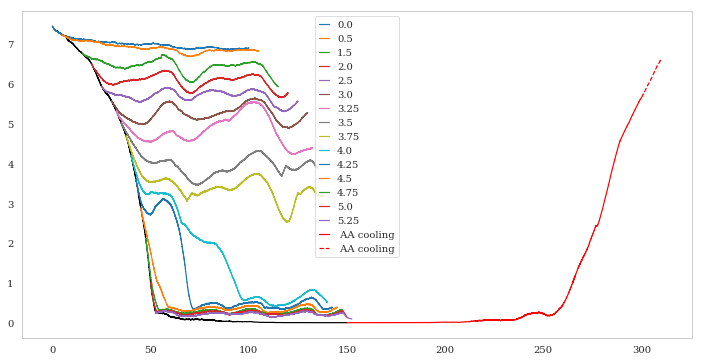

In [9]:
f,ax = plt.subplots(1,1, figsize = (12,6))
path = ptt +dirs[1]+'/'+ts
d = da.read_nc(path, 'sea_level_rise_potential')
l1 =ax.plot(d.time*sec_to_year,d.values ,color = 'k')
for i,folder in enumerate(dirs_under):
    tsAll = glob.glob( ptt+ dirs[1]+'/'+ folder +'/ts*.nc')
    path = ptt+ dirs[1]+'/'+ folder +'/'+ts
    d = da.read_nc(path, 'sea_level_rise_potential')
    lb = str( my_T_list[i])
    l1 =ax.plot(d.time*sec_to_year,d.values ,label = lb)
    tsll = glob.glob( ptt+ dirs[1]+'/'+ folder +'/ts*break*.nc')
    if len(tsll)==1:
        d = da.read_nc(tsll[0], 'sea_level_rise_potential')
        l2 =ax.plot(d.time*sec_to_year,d.values,color = l1[0].get_color() )
    if len(tsll)==2:
        d = da.read_nc(tsll[0], 'sea_level_rise_potential')
        l2 =ax.plot(d.time*sec_to_year,d.values,color = l1[0].get_color() )
        d = da.read_nc(tsll[1], 'sea_level_rise_potential')
        l2 =ax.plot(d.time*sec_to_year,d.values,color = l1[0].get_color() )
        
        
    
path = ptt+ dirs[1]+'/cooling_150ka/'+ts
d = da.read_nc(path, 'sea_level_rise_potential')
lb = ' AA cooling'
l1 =ax.plot(d.time*sec_to_year,d.values ,color = 'red', label = lb)

    
path = ptt+ dirs[1]+'/cooling_150ka/'+'cont_ts_gris_18000m.nc'
d = da.read_nc(path, 'sea_level_rise_potential')
lb = ' AA cooling'
l1 =ax.plot(d.time*sec_to_year,d.values ,color = 'red', linestyle = '--',label = lb)
ax.legend()
ax.legend()


In [9]:
dirconst_cool=[

'cont100K_with_dT_0.0_AA',
 'cont100K_with_dT_0.25_AA',
 'cont100K_with_dT_0.5_AA',
 'cont100K_with_dT_1.5_AA',
 'cont100K_with_dT_2.0_AA',
 'cont100K_with_dT_2.5_AA',
 'cont100K_with_dT_3.0_AA',
 'cont100K_with_dT_3.25_AA',
 'cont100K_with_dT_3.5_AA',
 'cont100K_with_dT_4.0_AA',
 'cont100K_with_dT_4.25_AA',
 'cont100K_with_dT_4.5_AA',
 'cont100K_with_dT_4.75_AA',
 'cont100K_with_dT_5.0_AA']

In [13]:
tsll

['/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_bed_def_mantle_viscosity_2.4e20/AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3/cont100K_with_dT_5.25_AA/ts_break_gris_18000m.nc']

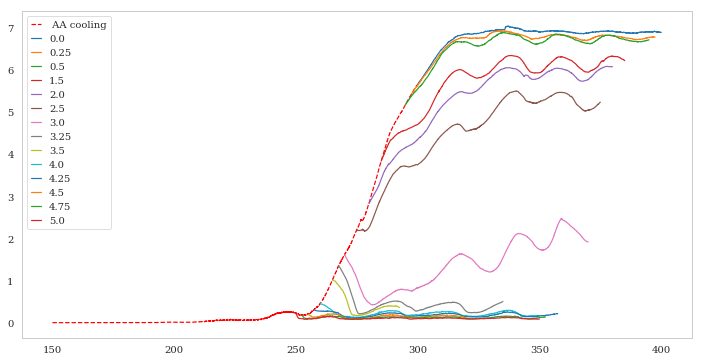

In [17]:
f,ax = plt.subplots(1,1, figsize = (12,6))
    
path = ptt+ dirs[1]+'/cooling_150ka/'+'ts_gris_18000m.nc'
dircool = ptt+ dirs[1]+'/cooling_150ka/'
d = da.read_nc(path, 'sea_level_rise_potential')
lb = ' AA cooling'
l1 =ax.plot(d.time*sec_to_year,d.values ,color = 'red', linestyle = '--',label = lb)
for dirn in dirconst_cool:
    lb = dirn.split('_')[-2]
    path = dircool + dirn +'/'+ts
    tsll = glob.glob(dircool + dirn +'/ts*.nc')
    if len(tsll) == 0:
        print('no run for', dirn)
    else:
        for i,tn in enumerate(tsll):
            d = da.read_nc(tn, 'sea_level_rise_potential')
            if i ==0:
                l1 =ax.plot(d.time*sec_to_year,d.values, label = lb)
            else:
                l1 =ax.plot(d.time*sec_to_year,d.values,color = l1[0].get_color())
                
    
  
ax.legend()



In [18]:
# path = ptt +dirs[1]+'/'+ts
# d = da.read_nc(path, 'sea_level_rise_potential')
# l1 =ax.plot(d.time*sec_to_year,d.values ,color = 'k')
slr_50ka ={}
time_mean = 50000
for i,folder in enumerate(dirconst_cool):
    print(folder)
#     tsall = glob.glob( ptt+ dirs[1]+'/'+ folder +'/ts*.nc')
    tsall = glob.glob(dircool + folder +'/ts*.nc')
    tsall.sort()
    
    time_50 =0
    slr_50=0
    if len(tsall) == 1:
#         print(tsall)
        d = da.read_nc(tsall[0], 'sea_level_rise_potential')
        if d.time.size < time_mean:
            slr_50 =d.values.mean()
        else:
            slr_50 =d.values[-time_mean:].mean()
            
        slr_50ka[folder.split('_')[-2]]=slr_50  
           
        
#     while time_50 < time_mean:
#         for tn in tsall:
#             d = da.read_nc(tn, 'sea_level_rise_potential')
#             time_s =d.time.size
#             if time_s <= (time_mean -time_50):
#                 print('small intersect need other ts for mean since t ', time_s)
#                 slr_50 = slr_50 + d.values.mean()*time_s/time_mean
#                 print('weighted slr', slr_50)
#                 time_50=time_50 +time_s
#                 print ('time 50',time_50)
                
#             else:
#                 if time_50 ==0:
#                     print('last ts bigger than 50ka with ',time_s)
#                     slr_50 =  d.values[-time_mean:].mean()
#                     print(' slr', slr_50)

#                     time_50=time_50 +time_mean
#                     print ('time 50',time_50)
                    
#                 else:
#                     remain_time = time_mean -time_50
#                     print('remaining time,',remain_time)
#                     slr_end = d.values[-remain_time:].mean()
#                     slr_50 = slr_50 + d.values.mean()*remain_time/time_mean
#                     print('weighted slr', slr_50)
                    
#                     time_50=time_50 +remain_time
#                     print ('time 50',time_50)
                    
#         break       
                
#     slr_50ka[folder.split('_')[-2]]=slr_50  
                
    
    

cont100K_with_dT_0.0_AA
cont100K_with_dT_0.25_AA
cont100K_with_dT_0.5_AA
cont100K_with_dT_1.5_AA
cont100K_with_dT_2.0_AA
cont100K_with_dT_2.5_AA
cont100K_with_dT_3.0_AA
cont100K_with_dT_3.25_AA
cont100K_with_dT_3.5_AA
cont100K_with_dT_4.0_AA
cont100K_with_dT_4.25_AA
cont100K_with_dT_4.5_AA
cont100K_with_dT_4.75_AA
cont100K_with_dT_5.0_AA


In [19]:
slr_50ka

{'0.0': 6.906179492988332,
 '2.0': 5.937858758165765,
 '2.5': 5.231099893970793,
 '3.0': 1.8257182967468801,
 '4.0': 0.2124048710952325,
 '4.25': 0.18311687851996755}

In [20]:
np.save(dircool +'/slr_mean_cooling_Tconst_last'+str(int(time_mean/1000))+'ka.npy',slr_50ka)

In [21]:
d.values

array([0.31066269, 0.31063656, 0.31058112, ..., 0.21674304, 0.21673984,
       0.21666987])

In [22]:
tsall

['/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_bed_def_mantle_viscosity_2.4e20/AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3/cooling_150ka/cont100K_with_dT_5.0_AA/ts_break_gris_18000m.nc',
 '/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_bed_def_mantle_viscosity_2.4e20/AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3/cooling_150ka/cont100K_with_dT_5.0_AA/ts_gris_18000m.nc']

In [23]:
path = ptt +dirs[1]+'/'+ts
d = da.read_nc(path, 'sea_level_rise_potential')
l1 =ax.plot(d.time*sec_to_year,d.values ,color = 'k')
slr_50ka ={}
time_mean = 50000
for i,folder in enumerate(dirs_under):
    print(folder)
    tsall = glob.glob( ptt+ dirs[1]+'/'+ folder +'/ts*.nc')
    tsall.sort()
    
    time_50 =0
    slr_50=0
    while time_50 < time_mean:
        for tn in tsall:
            d = da.read_nc(tn, 'sea_level_rise_potential')
            time_s =d.time.size
            if time_s <= (time_mean -time_50):
                print('small intersect need other ts for mean since t ', time_s)
                slr_50 = slr_50 + d.values.mean()*time_s/time_mean
                print('weighted slr', slr_50)
                time_50=time_50 +time_s
                print ('time 50',time_50)
                
            else:
                if time_50 ==0:
                    print('last ts bigger than 50ka with ',time_s)
                    slr_50 =  d.values[-time_mean:].mean()
                    print(' slr', slr_50)

                    time_50=time_50 +time_mean
                    print ('time 50',time_50)
                    
                else:
                    remain_time = time_mean -time_50
                    print('remaining time,',remain_time)
                    slr_end = d.values[-remain_time:].mean()
                    slr_50 = slr_50 + d.values.mean()*remain_time/time_mean
                    print('weighted slr', slr_50)
                    
                    time_50=time_50 +remain_time
                    print ('time 50',time_50)
                    
                    
                
    slr_50ka[folder.split('_')[-2]]=slr_50  
                
    
    

cont100K_with_dT_0.5_AA
last ts bigger than 50ka with  100000
 slr 6.826380921462308
time 50 50000
cont100K_with_dT_1.5_AA
last ts bigger than 50ka with  100000
 slr 6.351076369102017
time 50 50000
cont100K_with_dT_2.0_AA
last ts bigger than 50ka with  100000
 slr 6.022826617419467
time 50 50000
cont100K_with_dT_2.5_AA
last ts bigger than 50ka with  100000
 slr 5.682178217539354
time 50 50000
cont100K_with_dT_3.0_AA
last ts bigger than 50ka with  100000
 slr 5.280338569398955
time 50 50000
cont100K_with_dT_3.25_AA
small intersect need other ts for mean since t  12500
weighted slr 1.0770145607548065
time 50 12500
small intersect need other ts for mean since t  25000
weighted slr 3.6540164383157876
time 50 37500
remaining time, 12500
weighted slr 4.860091900064683
time 50 50000
cont100K_with_dT_3.5_AA
last ts bigger than 50ka with  100000
 slr 3.9969322110496828
time 50 50000
cont100K_with_dT_3.75_AA
last ts bigger than 50ka with  100000
 slr 3.2921845261500664
time 50 50000
cont100K_wit

In [24]:
'slr_mean_Tconst_last'+str(int(time_mean/1000))+'ka'

'slr_mean_Tconst_last50ka'

In [25]:
np.save(ptt+dirs[1]+'/slr_mean_Tconst_last'+str(int(time_mean/1000))+'ka.npy',slr_50ka)

In [23]:
ptt+dirs[1]+'slr_mean_Tconst_last'+str(int(time_mean/1000))+'ka.npy'

NameError: name 'time_mean' is not defined

In [24]:
dT_file = 'dT_1degCp10000a_AA.nc'
ptt_input =ptt.split('projection_runs')[0]+'input_data/'+dT_file
ds = da.read_nc(ptt_input)
dT_AA_annual = ds['delta_T'].values.reshape((int(len(ds.time)/12),12)).mean(axis =1)

/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/dimarray/io/nc.py:624: RuntimeWarning: 'bnds' dimension not found, define integer range
  warnings.warn(msg, RuntimeWarning)


In [25]:
dT_file = 'dT_1degCp10000a_AA_cooling.nc'
ptt_input =ptt.split('projection_runs')[0]+'input_data/'+dT_file
ds = da.read_nc(ptt_input)
dT_AA_annual_cooling = ds['delta_T'].values.reshape((int(len(ds.time)/12),12)).mean(axis =1)

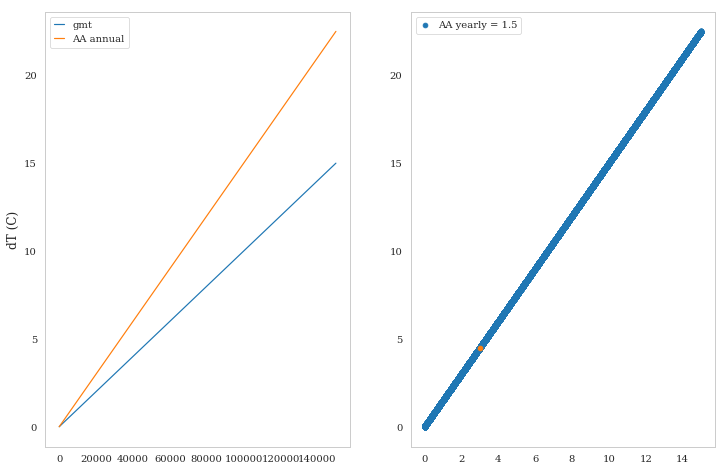

In [26]:
f, ax = plt.subplots(1,2, figsize =(12,8))
ax[0].plot(dT_year, label ='gmt')
ax[0].plot(dT_AA_annual, label = 'AA annual')
ax[0].set_ylabel('dT (C)')

ax[0].legend()
slope, intercept, r, p, se = st.linregress(dT_year,dT_AA_annual)
ax[1].scatter(dT_year,dT_AA_annual, label = 'AA yearly = ' +str(slope))
ax[1].scatter(3,4.5)
ax[1].legend()

### Assuming that we are going throught the hysteresis with both experimetns

In [30]:
slr_current

NameError: name 'slr_current' is not defined

## real hysteresis with last 50ka run from constant temperature:

In [27]:
path = ptt+ dirs[1]+'/cooling_150ka/'+ts
d = da.read_nc(path, 'sea_level_rise_potential')

In [28]:
d.time[::-1]*sec_to_year-150

array([1.50001e+02, 1.50000e+02, 1.49999e+02, ..., 3.00000e-03,
       2.00000e-03, 1.00000e-03])

0
AA_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3
67617
67617
1
AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3
2
from_1st_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3
3
from_2nd_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3


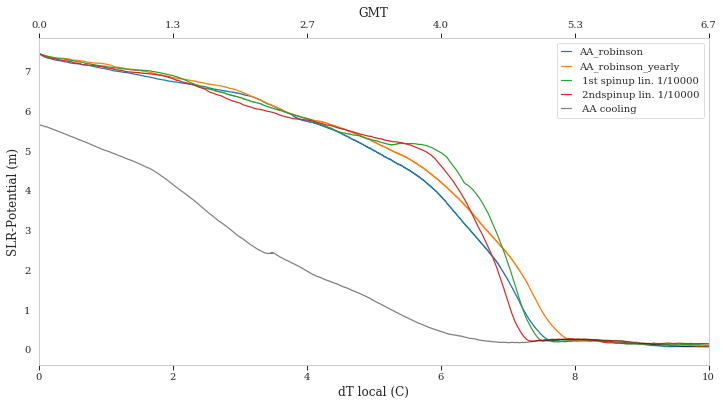

In [30]:
Ts =[dT_AA_annual,dT_AA_annual,dT_year,dT_year]
lb =['AA_robinson','AA_robinson_yearly', ' 1st spinup lin. 1/10000',' 2ndspinup lin. 1/10000']

f,ax = plt.subplots(1,1, figsize = (12,6))
for i,folder in enumerate(dirs[:4]):
    print(i)
    print(folder)
    
    path = ptt + folder +'/'+ts
    d = da.read_nc(path, 'sea_level_rise_potential')
    if (i == 0):
        slr_current = d.values[:d.values.size-(d.values.size %12)]
        slr =  slr_current.reshape((int(slr_current.size/12),12)).mean(axis =1)
        print(slr.size)
        T = Ts[i][:slr.size]
        print(T.size)
        
        ax.plot(T,slr ,label = lb[i])
    else:
        slr = d.values
        T = Ts[i][:slr.size]
        ax.plot(T,slr ,label = lb[i])
        
        
###
path = ptt+ dirs[1]+'/cooling_150ka/'+ts
d = da.read_nc(path, 'sea_level_rise_potential')
lbi = ' AA cooling'
l1 =ax.plot(dT_AA_annual_cooling,d.values ,color = 'black',alpha = 0.5, label = lbi)
ax.legend()

ax.set_xlabel('dT local (C)')
ax.set_xlim([0,10])
tick =ax.get_xticks()

ax2 = ax.twiny()
tick =ax.get_xticks()
ax2.set_xticks(tick)
ax2.set_xticklabels(np.round(tick/1.5,1))
ax2.set_xlabel('GMT')
#(tick)

# ax2.plot(T/1.5,slr)

ax.set_ylabel('SLR-Potential (m)')
ax.legend()


In [31]:
dirs

['AA_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'from_1st_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3',
 'from_2nd_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3',
 'AA_robinson_from_2rd_pa_t0_150k_precip_annual_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'AAyearly_robinson_from_2rd_pa_t0_150k_precip_annual_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'from_2nd_pa_t0_150k_precip_adjdT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3']

### cooling

# Make real hysteresis

In [39]:
dirs_hyst = [dirs_AA[0],dirs_loc[1]]

T_hyst = [dT_AA_annual,dT_year]
dirs_hyst_cool=['AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3/cooling_150ka/']
labs_equi =["eq. 1/10000 $ ^{\circ} C \cdot$ AA", "eq. 1/10000 $ ^{\circ} C $"]
labs =["1/10000 $ ^{\circ} C \cdot$ AA", " 1/10000 $ ^{\circ} C $"]

cols = ['red', 'blue']

In [37]:
dirs_loc

['from_1st_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3',
 'from_2nd_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3',
 'from_2nd_pa_t0_150k_precip_adjdT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3']

In [38]:
dirs_AA

['AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'AAyearly_robinson_from_2rd_pa_t0_150k_precip_annual_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'AA_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'AA_robinson_from_2rd_pa_t0_150k_precip_annual_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3']

In [36]:
dirs_hyst

['from_1st_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3',
 'AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3']

Text(0.5, 0, 'GMT')

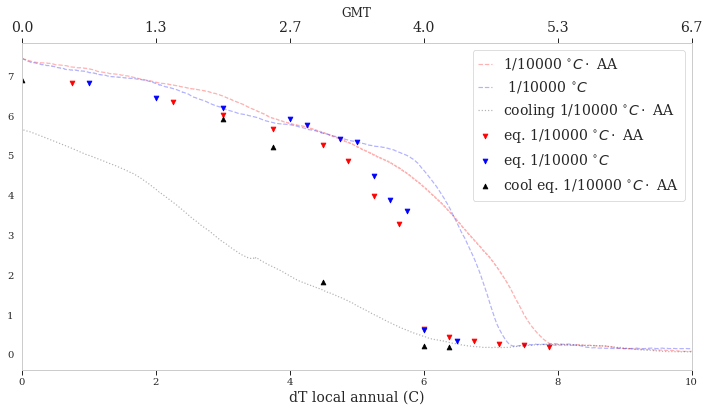

In [49]:
f,ax = plt.subplots(1,1, figsize = (12,6))
for i, din in enumerate(dirs_hyst):
    d = da.read_nc(ptt + din +'/'+ts,'sea_level_rise_potential')
    dicc = np.load(ptt + din +'/slr_mean_Tconst_last50ka.npy', allow_pickle = True)
    dic = dicc.item()
    dT = []
    slr = []
    if i == 0:
        fac = 1.5
    else: 
        fac = 1
#         d = da.read_nc(ptt + din +'/cont100K_with_dT_0.5degCp10000a/'+ts,'sea_level_rise_potential')
#         ax.plot(T_hyst[i][-d.values.size:],d.values,color = cols[i],label = '0.5degC10000a',alpha = 0.3, linestyle = '--')
        
    for key in dic.keys():
        dT.append(eval(key) *fac)
        slr.append(dic[key])
    ax.scatter(dT,slr,marker='v',label = labs_equi[i],color = cols[i])
    ax.plot(T_hyst[i][1:],d.values,color = cols[i],label = labs[i],alpha = 0.3, linestyle = '--')
for i, din in enumerate(dirs_hyst_cool):
    d = da.read_nc(ptt + din +'/'+ts,'sea_level_rise_potential')
    dicc = np.load(ptt + din +'/slr_mean_cooling_Tconst_last50ka.npy', allow_pickle = True)
    dic = dicc.item()
    dT = []
    slr = []
    if i == 0:
        fac = 1.5
    else: 
        fac = 1
    for key in dic.keys():
        dT.append(eval(key) *fac)
        slr.append(dic[key])
    ax.scatter(dT,slr,label ='cool '+ labs_equi[i],marker='^',color = 'k')
    ax.plot(T_hyst[i][::-1],d.values,color = 'k',alpha = 0.3, linestyle = 'dotted',label ='cooling '+ labs[i] ) 
    
ax.set_xlabel('dT local annual (C)',fontsize = 14)
ax.set_xlim([0,10])
tick =ax.get_xticks()
ax.legend(fontsize = 14)
ax2 = ax.twiny()
tick =ax.get_xticks()
ax2.set_xticks(tick)
ax2.set_xticklabels(np.round(tick/1.5,1),fontsize = 14)
ax2.set_xlabel('GMT')

## is the runn after tipping point to fast? use 0.5C in 10000 years

In [51]:
dir_05 = ['cont100K_with_dT_0.5degCp10000a_+2']
din = dirs_hyst[1]+'/' +dir_05[0]
d05 = da.read_nc(ptt + din +'/'+ts,'sea_level_rise_potential')

Text(0.5, 0, 'GMT')

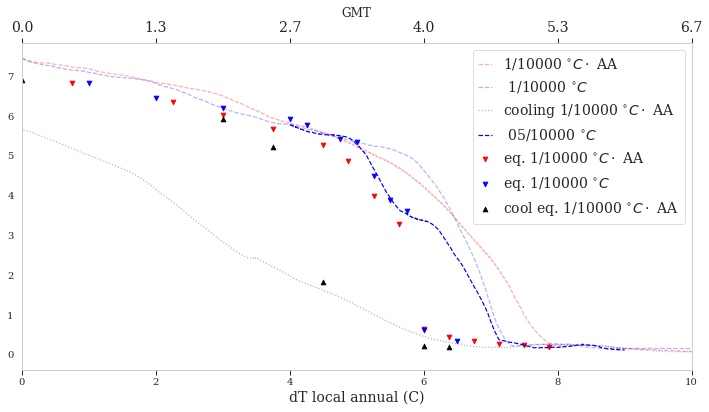

In [58]:
f,ax = plt.subplots(1,1, figsize = (12,6))
for i, din in enumerate(dirs_hyst):
    d = da.read_nc(ptt + din +'/'+ts,'sea_level_rise_potential')
    dicc = np.load(ptt + din +'/slr_mean_Tconst_last50ka.npy', allow_pickle = True)
    dic = dicc.item()
    dT = []
    slr = []
    if i == 0:
        fac = 1.5
    else: 
        fac = 1
#         d = da.read_nc(ptt + din +'/cont100K_with_dT_0.5degCp10000a/'+ts,'sea_level_rise_potential')
#         ax.plot(T_hyst[i][-d.values.size:],d.values,color = cols[i],label = '0.5degC10000a',alpha = 0.3, linestyle = '--')
        
    for key in dic.keys():
        dT.append(eval(key) *fac)
        slr.append(dic[key])
    ax.scatter(dT,slr,marker='v',label = labs_equi[i],color = cols[i])
    ax.plot(T_hyst[i][1:],d.values,color = cols[i],label = labs[i],alpha = 0.3, linestyle = '--')
for i, din in enumerate(dirs_hyst_cool):
    d = da.read_nc(ptt + din +'/'+ts,'sea_level_rise_potential')
    dicc = np.load(ptt + din +'/slr_mean_cooling_Tconst_last50ka.npy', allow_pickle = True)
    dic = dicc.item()
    dT = []
    slr = []
    if i == 0:
        fac = 1.5
    else: 
        fac = 1
    for key in dic.keys():
        dT.append(eval(key) *fac)
        slr.append(dic[key])
    ax.scatter(dT,slr,label ='cool '+ labs_equi[i],marker='^',color = 'k')
    ax.plot(T_hyst[i][::-1],d.values,color = 'k',alpha = 0.3, linestyle = 'dotted',label ='cooling '+ labs[i] ) 
dT_05 = da.read_nc('/home/beckmann/mnt/cluhome/exp_pism/dEBM/input_data/dT_0.5degCp10000a_+2.nc','delta_T' )
plt.plot(dT_05.values[40000:40000+d05.values.size],d05.values, color = 'blue', linestyle = '--', label = " 05/10000 $ ^{\circ} C $" )    
ax.set_xlabel('dT local annual (C)',fontsize = 14)
ax.set_xlim([0,10])
tick =ax.get_xticks()
ax.legend(fontsize = 14)
ax2 = ax.twiny()
tick =ax.get_xticks()
ax2.set_xticks(tick)
ax2.set_xticklabels(np.round(tick/1.5,1),fontsize = 14)
ax2.set_xlabel('GMT')

In [42]:
dirs_hyst

['AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'from_2nd_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3']

#### compare with bed defalut from Maria


In [93]:
dirs_new = []
for i,folder in enumerate(dirs):
    dirs_new.append(ptt + folder +'/'+ts)

In [94]:
projection_folder ='18000m_Maria/'

ptt = '/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/' +projection_folder
folder = 'from2nd_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3'
dirs_new.append(ptt + folder +'/'+ts)
lb.append('Maria , 2nd spinup  lin 1 /10000')

0
/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_bed_def_mantle_viscosity_2.4e20/AA_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3/ts_gris_18000m.nc
67617
67617
1
/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_bed_def_mantle_viscosity_2.4e20/AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3/ts_gris_18000m.nc
2
/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_bed_def_mantle_viscosity_2.4e20/from_1st_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3/ts_gris_18000m.nc
3
/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_bed_def_mantle_viscosity_2.4e20/from_2nd_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3/ts_gris_18000m.nc
4
/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_Maria/from2nd_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3/ts_gris_18000m.nc


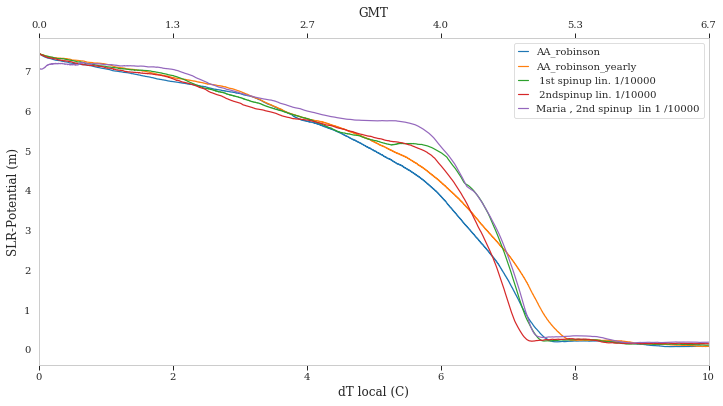

In [95]:
Ts =[dT_AA_annual,dT_AA_annual,dT_year,dT_year,dT_year]

f,ax = plt.subplots(1,1, figsize = (12,6))
for i,folder in enumerate(dirs_new):
    print(i)
    print(folder)
    
    path = folder
    d = da.read_nc(path, 'sea_level_rise_potential')
    if (i == 0):
        slr_current = d.values[:d.values.size-(d.values.size %12)]
        slr =  slr_current.reshape((int(slr_current.size/12),12)).mean(axis =1)
        print(slr.size)
        T = Ts[i][:slr.size]
        print(T.size)
        
        ax.plot(T,slr ,label = lb[i])
    else:
        slr = d.values
        T = Ts[i][:slr.size]
        ax.plot(T,slr ,label = lb[i])
ax.set_xlabel('dT local (C)')
ax.set_xlim([0,10])
tick =ax.get_xticks()

ax2 = ax.twiny()
tick =ax.get_xticks()
ax2.set_xticks(tick)
ax2.set_xticklabels(np.round(tick/1.5,1))
ax2.set_xlabel('GMT')
#(tick)

# ax2.plot(T/1.5,slr)

ax.set_ylabel('SLR-Potential (m)')
ax.legend()


In [61]:
dirs_comp =[ dirs_under[8],dirs_under[5],dirs_under[10]]
cols =['blue','orange', 'red']

In [62]:
dirs

['AA_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'AAyearly_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'from_1st_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3',
 'from_2nd_pa_t0_150k_dT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3',
 'AA_robinson_from_2rd_pa_t0_150k_precip_annual_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'AAyearly_robinson_from_2rd_pa_t0_150k_precip_annual_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3',
 'from_2nd_pa_t0_150k_precip_adjdT_1degCp10000a_ssa_n_3_q_0.1_sia_e_3']

'cont100K_with_dT_4.25_AA'

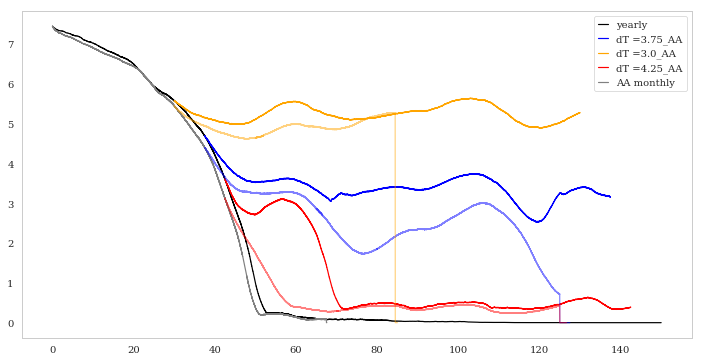

In [67]:
f,ax = plt.subplots(1,1, figsize = (12,6))
path = ptt +dirs[1]+'/'+ts
d = da.read_nc(path, 'sea_level_rise_potential')
l1 =ax.plot(d.time*sec_to_year,d.values ,color = 'k', label = 'yearly')
for i,folder in enumerate(dirs_comp):
    col =cols[i]
    lb = folder.split('dT_')[-1]    
    tsAll = glob.glob( ptt+ dirs[1]+'/'+ folder +'/ts*.nc')
    for j,tn in enumerate(tsAll):
        d = da.read_nc(tn, 'sea_level_rise_potential')
        
        if j == 0:
            l2 =ax.plot(d.time*sec_to_year,d.values,color = col,label = 'dT =' +lb)
        else: 
        
            l2 =ax.plot(d.time*sec_to_year,d.values,color = col)

path = ptt +dirs[0]+'/'+ts
d = da.read_nc(path, 'sea_level_rise_potential')        
l1 =ax.plot(d.time*sec_to_year,d.values ,color = 'grey', label = 'AA monthly')

for i,folder in enumerate(dirs_comp):
    col =cols[i]
    
    tsAll = glob.glob( ptt+ dirs[0]+'/'+ folder +'/ts*.nc')
#     path = ptt+ dirs[0]+'/'+ folder +'/'+ts
#     d = da.read_nc(path, 'sea_level_rise_potential')
#     lb = str( my_T_list[8])+ 'monthly'
#     l1 =ax.plot(d.time*sec_to_year,d.values ,label = lb)

    for tn in tsAll:
        d = da.read_nc(tn, 'sea_level_rise_potential')
        l2 =ax.plot(d.time*sec_to_year,d.values,color = col, alpha = 0.5)

ax.legend()

In [20]:
tsAll

['/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_bed_def_mantle_viscosity_2.4e20/AA_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3/cont100K_with_dT_4.25_AA/ts_gris_18000m.nc']

In [26]:
tsll[-1]

'/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_bed_def_mantle_viscosity_2.4e20/AA_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3/cont100K_with_dT_3.75_AA/ts_break4_gris_18000m.nc'

In [27]:
d.time*sec_to_year

array([57.50008333, 57.50016667, 57.50025   , ..., 61.87366667,
       61.87375   , 61.87383333])

In [24]:
path = ptt +dirs[0]+'/'+ts

In [25]:
 d = da.read_nc(tsll[-1], 'sea_level_rise_potential')

In [26]:
tsAll

['/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_bed_def_mantle_viscosity_2.4e20/AA_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3/cont100K_with_dT_3.75_AA/ts_break_gris_18000m.nc',
 '/home/beckmann/mnt/cluhome/exp_pism/dEBM/projection_runs/18000m_bed_def_mantle_viscosity_2.4e20/AA_robinson_from_2rd_pa_t0_150k_dT_1degCp10000a_AA_ssa_n_3_q_0.1_sia_e_3/cont100K_with_dT_3.75_AA/ts_gris_18000m.nc']

In [24]:
d

dimarray: 1 non-null elements (0 null)
0 / time (1): 3784320000000.0 to 3784320000000.0
array([0.39584486])